In [148]:
import matplotlib.pyplot as plt
import numpy as np

In [149]:
NCOURSES = np.array([13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7])
HAPPINESS = np.array([70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70])

In [150]:
beta_analysis = np.polyfit(NCOURSES, HAPPINESS, 1)
intercepts_analysis = beta_analysis[1]
slope_analysis = beta_analysis[0]

In [151]:
RESOLUTION = 50

min_sse = 1e10
min_slope = 1e10
min_intercept = 1e10

sses = np.zeros((RESOLUTION, RESOLUTION))
slopes = np.linspace(0, 6, RESOLUTION, endpoint=True)
intercepts = np.linspace(0, 80, RESOLUTION, endpoint=True)
for i, m in enumerate(slopes):
    for j, c in enumerate(intercepts):
        pred = m * NCOURSES + c
        sses[j, i] = np.sum((pred - HAPPINESS)**2)
        if min_sse > sses[j, i]:
            min_sse = sses[j, i]
            min_slope = m
            min_intercept = c

In [152]:
print(f"Analytic solution:")
print(f"\tslope    : {slope_analysis:.2f}")
print(f"\tintercept: {intercepts_analysis:.2f}")

print(f"Grid solution    :")
print(f"\tslope    : {min_slope:.2f}")
print(f"\tintercept: {min_intercept:.2f}")

Analytic solution:
	slope    : 3.70
	intercept: 23.13
Grid solution    :
	slope    : 3.67
	intercept: 22.86


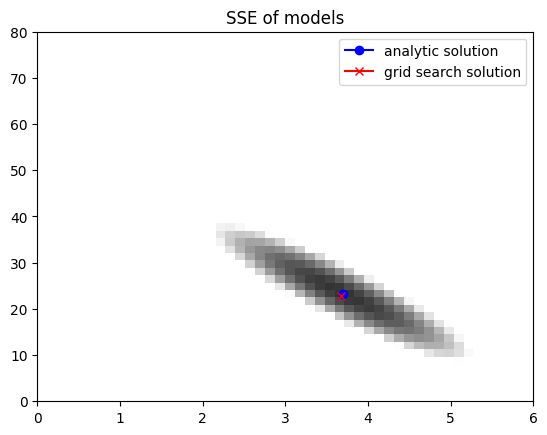

In [153]:
fig, ax = plt.subplots()
ax.set_title("SSE of models")
ax.imshow(sses, aspect="auto", extent=[slopes[0],slopes[-1],intercepts[0],intercepts[-1]], cmap="gray", origin="lower", vmin=2000, vmax=3000)
ax.plot(slope_analysis, intercepts_analysis, "bo-", label="analytic solution")
ax.plot(min_slope, min_intercept, "rx-", label="grid search solution")
plt.legend()
plt.show()